In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

In [2]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()                                       #loading whole dataset
breast_data = breast.data                                           #assigning feature values
breast_labels = breast.target                                       #assigning target values
labels = np.reshape(breast_labels,(569,1))                          #the lable column needs to be reshaped to work with concatenate function
final_breast_data = np.concatenate([breast_data,labels],axis=1)     # features and targets are combined

breast_dataset = pd.DataFrame(final_breast_data)                    #A dataframe instead of an array is created
features = breast.feature_names                                     #the names of the features are called

features_labels = np.append(features,'label')                       # The term label for the target column is added to the feature names
breast_dataset.columns = features_labels                            # The columns of the dataframe are named accordingly
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
X = breast_dataset.iloc[:, :-1]
y = breast_dataset.iloc[:, -1]

X_standardized = (X - X.mean()) / X.std()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y

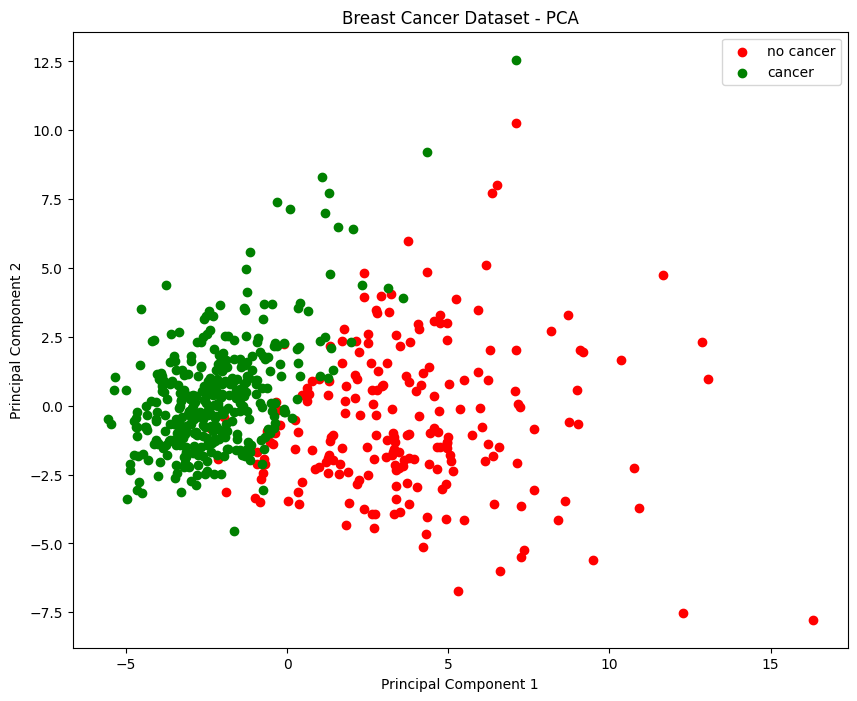

In [9]:
plt.figure(figsize=(10, 8))
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indices = pca_df['label'] == target
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], c=color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Breast Cancer Dataset - PCA')
plt.legend(['no cancer', 'cancer'])
plt.show()

In [10]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(breast_data, breast_labels)

lda_df = pd.DataFrame(data=X_lda, columns=['LD1'])
lda_df['label'] = breast_labels

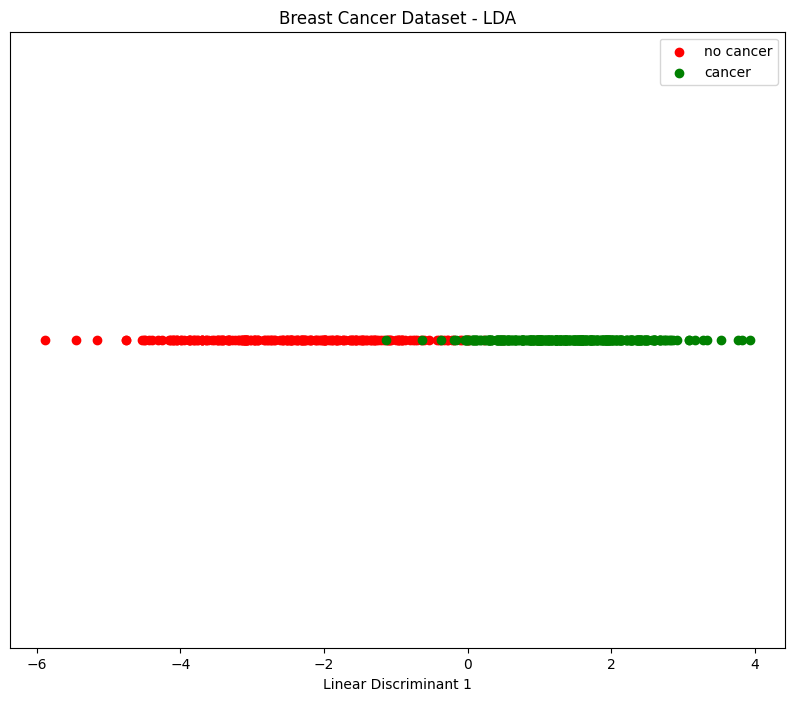

In [15]:
plt.figure(figsize=(10, 8))
targets = [0, 1]  # Labels: 0 for benign, 1 for malignant
colors = ['r', 'g']  # Red for benign, green for malignant
for target, color in zip(targets, colors):
    indices = lda_df['label'] == target
    plt.scatter(lda_df.loc[indices, 'LD1'], [0] * sum(indices), c=color)
plt.xlabel('Linear Discriminant 1')
plt.title('Breast Cancer Dataset - LDA')
plt.yticks([])
plt.legend(['no cancer', 'cancer'])
plt.show()

In [16]:
# in LDA the n_components can only be set to 1 (n-class -1 ) so the final figure have only 1-D result.
# so for those data, I think the PCA model suit better.